<a href="https://colab.research.google.com/github/Arnab1876/Covid_data_Causal_relations/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

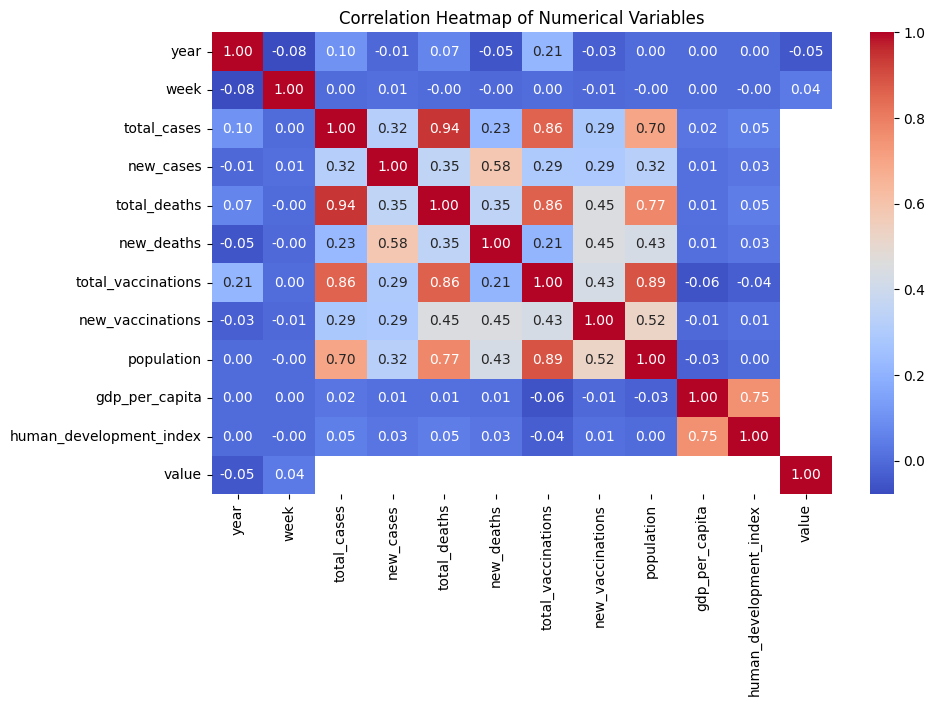

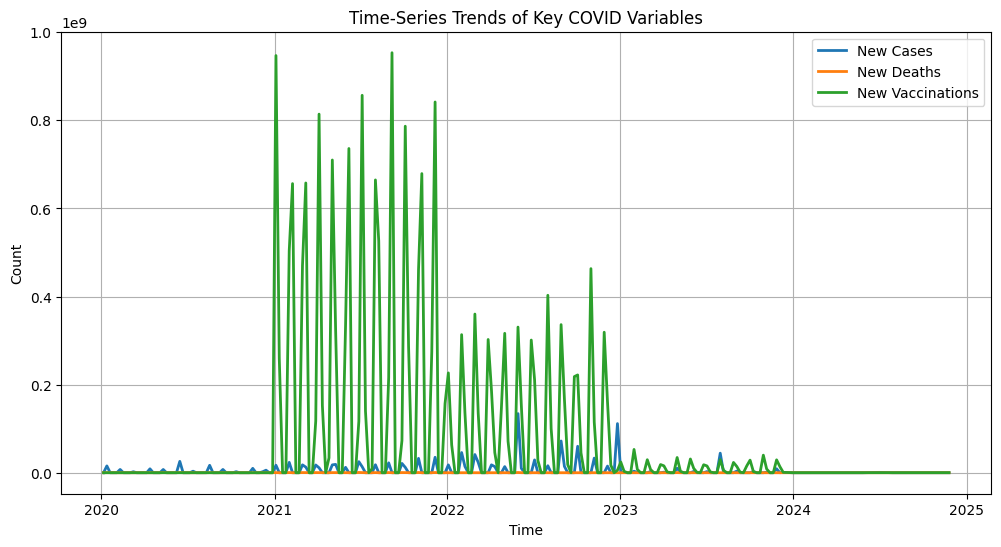


 Top variables correlated with treatment (new_vaccinations):
new_vaccinations           1.000000
population                 0.524991
new_deaths                 0.451517
total_deaths               0.451514
total_vaccinations         0.429650
new_cases                  0.290716
total_cases                0.287638
human_development_index    0.012902
gdp_per_capita            -0.005227
week                      -0.005288
Name: new_vaccinations, dtype: float64

 Top variables correlated with outcome (new_deaths):
new_deaths                 1.000000
new_cases                  0.583147
new_vaccinations           0.451517
population                 0.427315
total_deaths               0.349515
total_cases                0.229329
total_vaccinations         0.212052
human_development_index    0.025829
gdp_per_capita             0.006202
week                      -0.004311
Name: new_deaths, dtype: float64


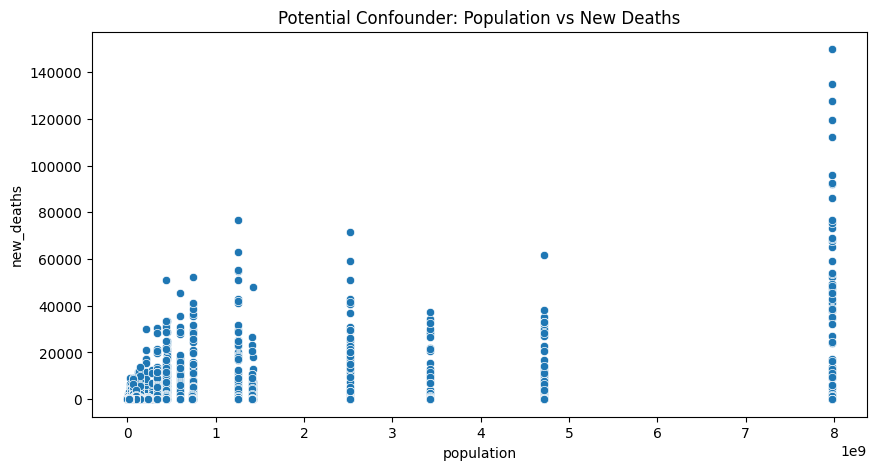

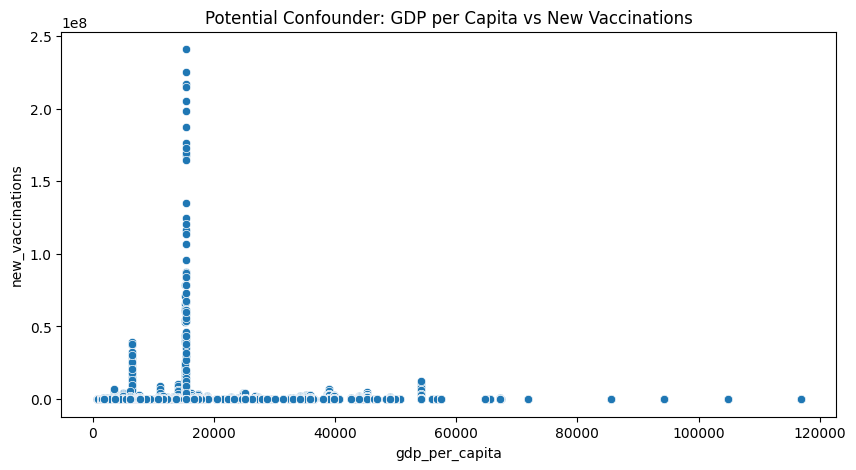

In [1]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline (if using Jupyter)
%matplotlib inline

# --- 2. Load Dataset ---
df = pd.read_csv("merged_dataset.csv", low_memory=False)

# --- 3. Basic Cleaning ---
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert year-week into a datetime column for time-series plotting
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['week'].astype(str) + '-1', format='%Y-%W-%w', errors='coerce')

# --- 4. Correlation Heatmap ---
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# --- 5. Time-Series Trends ---
# Group by date to aggregate weekly data
ts_df = df.groupby('date').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'new_vaccinations': 'sum',
    'value': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(ts_df['date'], ts_df['new_cases'], label='New Cases', linewidth=2)
plt.plot(ts_df['date'], ts_df['new_deaths'], label='New Deaths', linewidth=2)
plt.plot(ts_df['date'], ts_df['new_vaccinations'], label='New Vaccinations', linewidth=2)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Time-Series Trends of Key COVID Variables")
plt.grid(True)
plt.show()

# --- 6. Confounder Analysis ---
# Example: Identify variables correlated with both vaccination (treatment) and deaths (outcome)
treatment = 'new_vaccinations'
outcome = 'new_deaths'

corr_with_treatment = numeric_df.corr()[treatment].sort_values(ascending=False)
corr_with_outcome = numeric_df.corr()[outcome].sort_values(ascending=False)

print("\n Top variables correlated with treatment (new_vaccinations):")
print(corr_with_treatment.head(10))
print("\n Top variables correlated with outcome (new_deaths):")
print(corr_with_outcome.head(10))

# --- 7. Visualize potential confounders ---
# For example: population and GDP per capita as possible confounders
plt.figure(figsize=(10, 5))
sns.scatterplot(x='population', y='new_deaths', data=df)
plt.title("Potential Confounder: Population vs New Deaths")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='gdp_per_capita', y='new_vaccinations', data=df)
plt.title("Potential Confounder: GDP per Capita vs New Vaccinations")
plt.show()